# paper: FRB 220319aaeb

In [1]:
import sys
#sys.path.insert(1, '/home/ubuntu/gechen/software/burstfit/examples/')
#import import_ipynb
import burstfit.BurstFit_paper_template as paper_fit

from burstfit.utils.functions import pulse_fn, sgram_fn, gauss, gauss_norm, model_free_4, model_free_normalized_4, power_law # pulse_fn_vec  
import numpy as np

%matplotlib inline 



/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.2.1_6_g1a8a603_dirty-py3.6.egg/burstfit/utils/plotter.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "

datacite/tind env not found. Cannot use datacite API


In [2]:
paper_fit

AttributeError: module 'burstfit.BurstFit_paper_template' has no attribute 'real_time_burstfit'

In [3]:
# input variables 
candidate = '220319aaeb'
datestring = '2022_3_18_4_44_53'
beam = 172
corr = 'corr09'
snr_heimdall = 41.7
dm_heimdall = 111
width_heimdall = 1 

voltage = True
dedisperse = True 
fil_file = '/home/ubuntu/vikram/scratch/' + candidate + '.fil'
mask_chans=[] 
nfreq = 4 
fil_file_dedispersed = '/home/ubuntu/gechen/software/burstfit/fil_files_dedispersed/%s_%d_%s.txt'%(candidate, nfreq, str(voltage))
t_chop_width_int = 60


2022-07-22 00:59:53,325 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-07-22 00:59:53,349 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-07-22 00:59:53,352 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-07-22 00:59:53,354 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (masked, masked)


using filterbank  /data/dsa110/T1/corr09/2022_3_18_4_44_53/fil_220319aaeb/220319aaeb_172.fil


2022-07-22 00:59:53,364 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-07-22 00:59:54,003 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-07-22 00:59:54,006 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-07-22 00:59:54,009 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (masked, masked)


using filterbank  /home/ubuntu/vikram/scratch/220319aaeb.fil
dedisperse...
len(t_burst), np.shape(data_burst), i_low, i_high 120 (4, 120) 15451 15571
np.shape(data) (4, 65536)
len(t_burst[::bin_size]), len(data_t_binned): 15, 15
(4, 120)


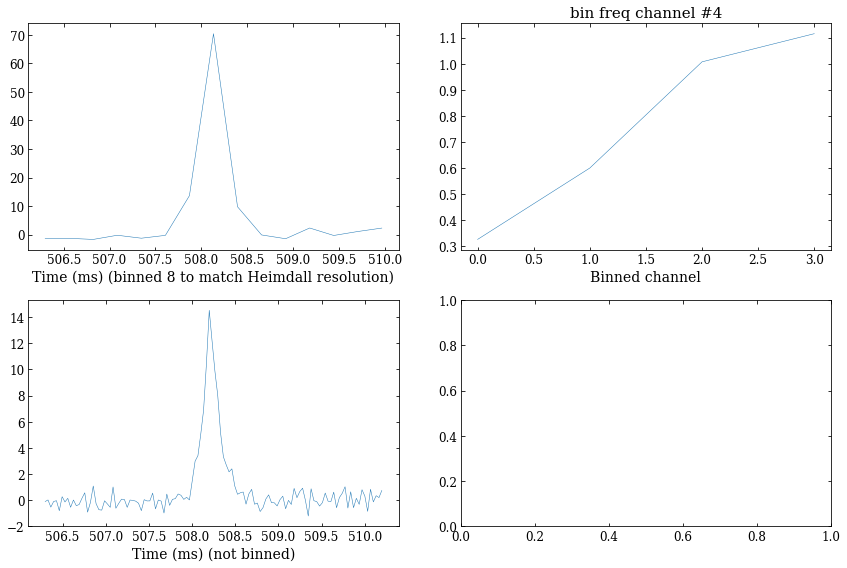

In [4]:
bd_heimdall, fil_file_heimdall = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=False)

bd, fil_file  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=True)


data_burst = paper_fit.prepare_burst_data(fil_file, fil_file_dedispersed, candidate, bd_heimdall, bd, voltage = voltage,
                                t_chop_center_s=0.5, t_chop_width = t_chop_width_int * width_heimdall, 
                               dedisperse=dedisperse, nfreq = nfreq)

In [5]:
bd_heimdall.foff * bd_heimdall.nchans, bd_heimdall.fch1, bd_heimdall.fch1 + bd_heimdall.foff * bd_heimdall.nchans

(-250.0, 1530.0, 1280.0)

In [6]:
bd.foff * bd.nchans, bd.fch1, bd.fch1 + bd.foff * bd.nchans

(-187.49999996928, 1498.75, 1311.25000003072)

## S1: Spectrum--  4 channels, normalized
## T1: Time profile-- Gaussian 
## T2: Time profile-- Gaussian + scattering
## cx: x-components in time profile 

### No scattering

self.function_input_names:  ['S', 'mu', 'sigma']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-07-22 01:00:42,343 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-07-22 01:00:42,346 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-07-22 01:00:42,352 - tests -root - INFO - P values: T-test (0.37031), Kruskal (0.29362), KS (0.66014), F-test (0.81517)
2022-07-22 01:00:42,354 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-07-22 01:00:42,359 - tests -root - INFO - P values: T-test (0.00065), Kruskal (0.00078), KS (0.00016), F-test (0.00049)
2022-07-22 01:00:42,361 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-07-22 01:00:42,364 - tests -root - INFO - P values: T-test (0.00094), Kruskal (0.00078), KS (0.00016), F-test (0.00005)
2022-07-22 01:00:42,366 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-07-22 01:00:42,368 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-07-22 01:00:42,370 - initial_profi

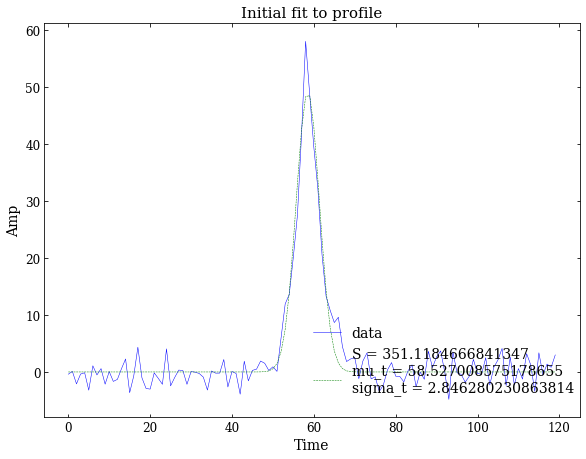

2022-07-22 01:00:42,578 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-07-22 01:00:42,581 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f447a68f0d0>
[0.09705494 0.26526412 0.44478154 0.48285386]


2022-07-22 01:00:42,588 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-07-22 01:00:42,591 - initial_spectrafit -burstfit.fit - INFO - c0: 0.09705493599176407 +- 0.0
2022-07-22 01:00:42,593 - initial_spectrafit -burstfit.fit - INFO - c1: 0.2652641236782074 +- 0.0
2022-07-22 01:00:42,596 - initial_spectrafit -burstfit.fit - INFO - c2: 0.4447815418243408 +- 0.0


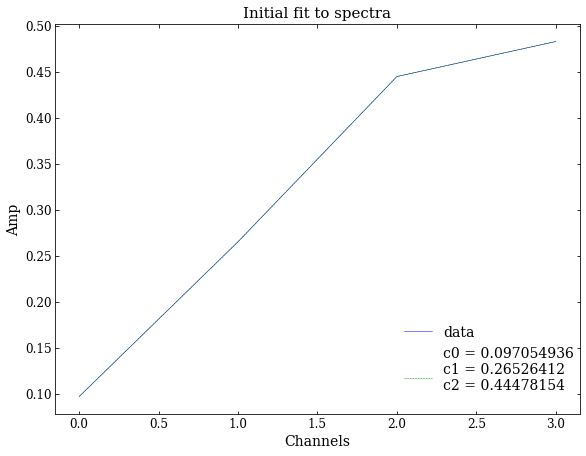

2022-07-22 01:00:42,783 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-07-22 01:00:42,786 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.097054936, 0.26526412, 0.44478154, 351.1184666841347, 58.527008575178655, 2.846280230863814, 111]
2022-07-22 01:00:42,857 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-07-22 01:00:42,859 - sgram_fit -burstfit.fit - INFO - c0: 0.0923651938814403 +- 0.012266531267548814
2022-07-22 01:00:42,861 - sgram_fit -burstfit.fit - INFO - c1: 0.27027368074993885 +- 0.010112851121509657
2022-07-22 01:00:42,862 - sgram_fit -burstfit.fit - INFO - c2: 0.43933255995896575 +- 0.009959763402443074
2022-07-22 01:00:42,864 - sgram_fit -burstfit.fit - INFO - S: 284.4159950191938 +- 10.013511365454647
2022-07-22 01:00:42,865 - sgram_fit -burstfit.fit - INFO - mu_t: 58.53291409254457 +- 0.16252724928999826
2022-07-22 01:00:42,867 - sgram_fit -burstfit.fit - INFO - sigma_t: 3.136547863957624 +- 0.0

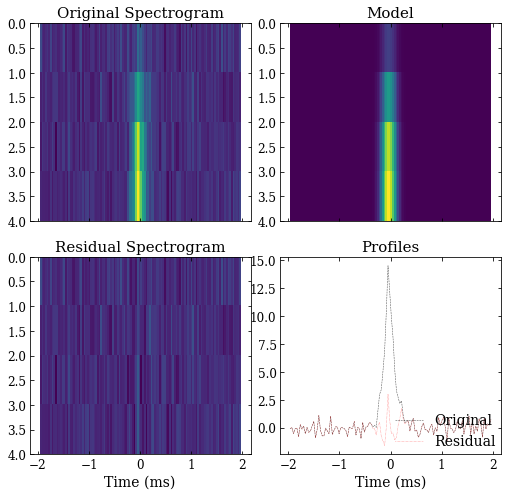

2022-07-22 01:00:43,322 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:00:43,325 - model -burstfit.fit - INFO - Found 1 components.
2022-07-22 01:00:43,328 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-07-22 01:00:43,331 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-07-22 01:00:43,333 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:00:43,335 - model -burstfit.fit - INFO - Found 1 components.
2022-07-22 01:00:43,338 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.317683940402132
2022-07-22 01:00:43,341 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-07-22 01:00:43,342 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-07-22 01:00:43,345 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to 

{bf}.calc_redchisq()= (1.317683940402132, 3.945850473252577e-06)


In [7]:
bf_S1T1_c1 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t'], gauss, 
          [(0, 50, 0),(np.inf, 70, 5*bd.width)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)

self.function_input_names:  ['S', 'mu', 'sigma']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-07-22 01:02:32,429 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-07-22 01:02:32,431 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-07-22 01:02:32,435 - tests -root - INFO - P values: T-test (0.37031), Kruskal (0.29362), KS (0.66014), F-test (0.81517)
2022-07-22 01:02:32,437 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-07-22 01:02:32,442 - tests -root - INFO - P values: T-test (0.00065), Kruskal (0.00078), KS (0.00016), F-test (0.00049)
2022-07-22 01:02:32,444 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-07-22 01:02:32,448 - tests -root - INFO - P values: T-test (0.00094), Kruskal (0.00078), KS (0.00016), F-test (0.00005)
2022-07-22 01:02:32,450 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-07-22 01:02:32,452 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-07-22 01:02:32,454 - initial_profi

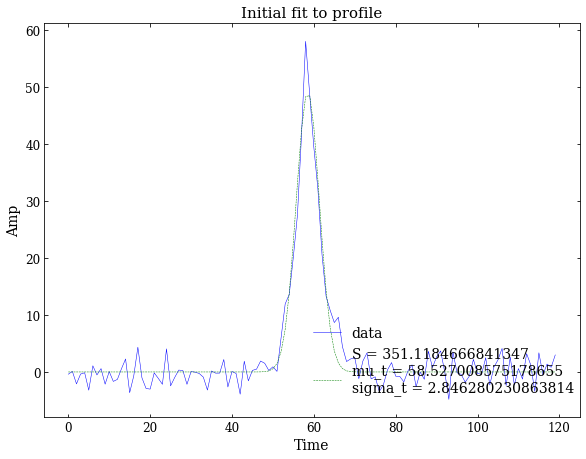

2022-07-22 01:02:32,667 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-07-22 01:02:32,671 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f447a68f0d0>
[0.09705494 0.26526412 0.44478154 0.48285386]


2022-07-22 01:02:32,677 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-07-22 01:02:32,679 - initial_spectrafit -burstfit.fit - INFO - c0: 0.09705493599176407 +- 0.0
2022-07-22 01:02:32,681 - initial_spectrafit -burstfit.fit - INFO - c1: 0.2652641236782074 +- 0.0
2022-07-22 01:02:32,683 - initial_spectrafit -burstfit.fit - INFO - c2: 0.4447815418243408 +- 0.0


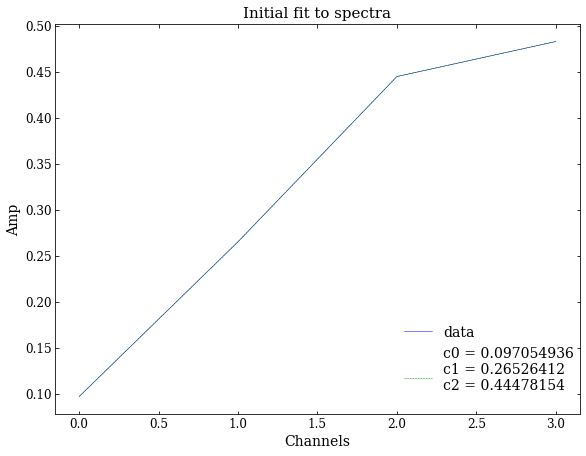

2022-07-22 01:02:32,864 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-07-22 01:02:32,867 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.097054936, 0.26526412, 0.44478154, 351.1184666841347, 58.527008575178655, 2.846280230863814, 111]
2022-07-22 01:02:32,932 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-07-22 01:02:32,935 - sgram_fit -burstfit.fit - INFO - c0: 0.0923651938814403 +- 0.012266531267548814
2022-07-22 01:02:32,937 - sgram_fit -burstfit.fit - INFO - c1: 0.27027368074993885 +- 0.010112851121509657
2022-07-22 01:02:32,940 - sgram_fit -burstfit.fit - INFO - c2: 0.43933255995896575 +- 0.009959763402443074
2022-07-22 01:02:32,943 - sgram_fit -burstfit.fit - INFO - S: 284.4159950191938 +- 10.013511365454647
2022-07-22 01:02:32,944 - sgram_fit -burstfit.fit - INFO - mu_t: 58.53291409254457 +- 0.16252724928999826
2022-07-22 01:02:32,946 - sgram_fit -burstfit.fit - INFO - sigma_t: 3.136547863957624 +- 0.0

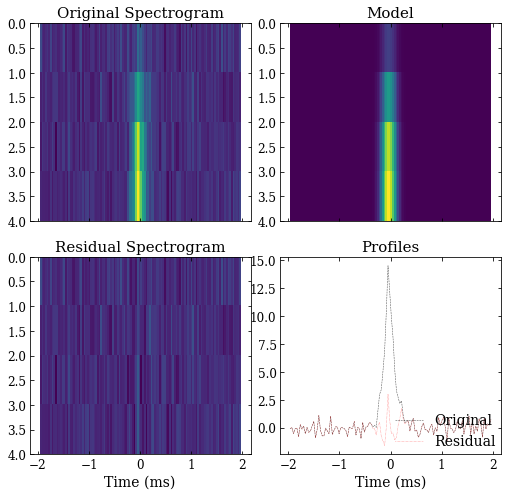

2022-07-22 01:02:33,396 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:02:33,399 - model -burstfit.fit - INFO - Found 1 components.
2022-07-22 01:02:33,404 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-07-22 01:02:33,406 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-07-22 01:02:33,408 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:02:33,410 - model -burstfit.fit - INFO - Found 1 components.
2022-07-22 01:02:33,414 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.317683940402132
2022-07-22 01:02:33,416 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 2
2022-07-22 01:02:33,418 - fitcycle -burstfit.fit - INFO - Fitting component 2.
2022-07-22 01:02:33,420 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 2
2022-07-22 01:02:33,452 - initial_profilef

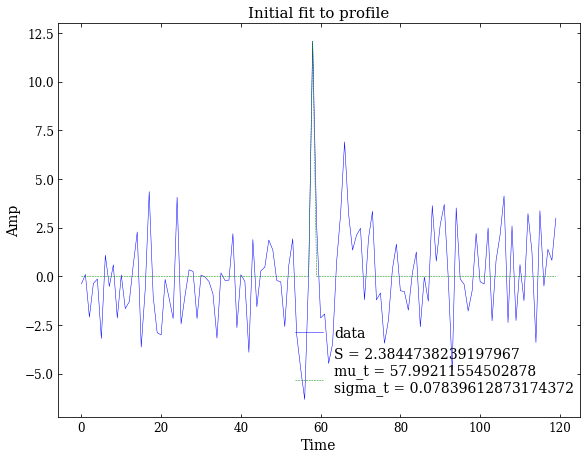

2022-07-22 01:02:33,623 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-07-22 01:02:33,627 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_normalized_4 at 0x7f447a68f0d0>
[-0.0076605417807847215 0.0464887871461892 0.8421124584948237
 0.23045805049875892]


2022-07-22 01:02:33,634 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-07-22 01:02:33,636 - initial_spectrafit -burstfit.fit - INFO - c0: -0.0076605417807847215 +- 0.0
2022-07-22 01:02:33,637 - initial_spectrafit -burstfit.fit - INFO - c1: 0.0464887871461892 +- 0.0
2022-07-22 01:02:33,639 - initial_spectrafit -burstfit.fit - INFO - c2: 0.8421124584948237 +- 0.0


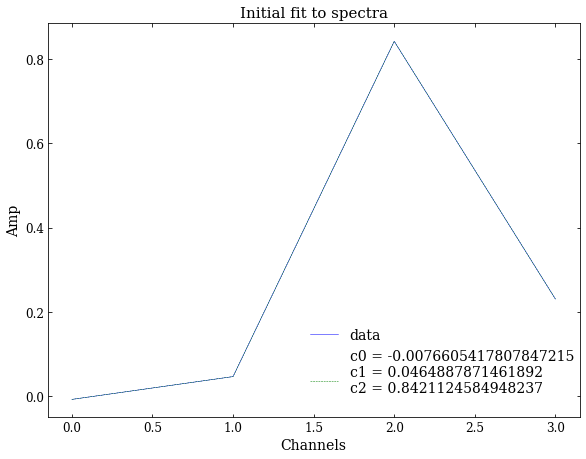

2022-07-22 01:02:33,785 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-07-22 01:02:33,789 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [-0.0076605417807847215, 0.0464887871461892, 0.8421124584948237, 2.3844738239197967, 57.99211554502878, 0.07839612873174372, 111]
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
2022-07-22 01:02:33,841 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-07-22 01:02:34,072 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-07-22 01:02:34,075 - sgram_fit -burstfit.fit - INFO - c0: -0.006128433424630237 +- 0.4317826474059486
2022-07-22 01:02:34,077 - sgram_fit -burstfit.fit - INFO - c1: 0.05578654454669077 +- 0.13914548767627685
2022-07-22 01:02:34,080 - sgram_fit -burstfit.fit - INFO - c2: 

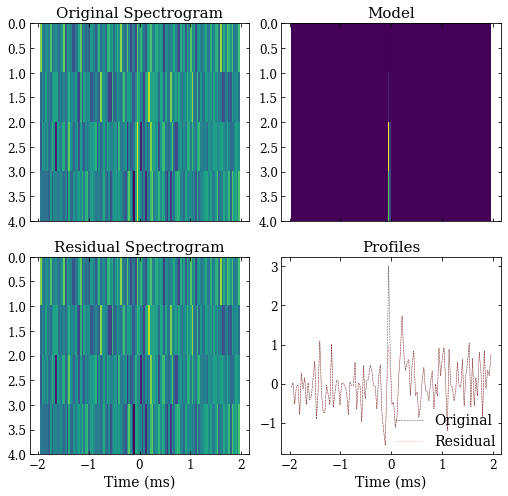

2022-07-22 01:02:34,688 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:02:34,691 - model -burstfit.fit - INFO - Found 2 components.
2022-07-22 01:02:34,696 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-07-22 01:02:34,698 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-07-22 01:02:34,700 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:02:34,702 - model -burstfit.fit - INFO - Found 2 components.
2022-07-22 01:02:34,707 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.2608510298463065
2022-07-22 01:02:34,709 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-07-22 01:02:34,711 - fitall -burstfit.fit - INFO - Final number of components 2 > 1. Fitting all components together.
2022-07-22 01:02:34,712 - fit_all_components -burstfit.fit - INFO - Fitting 2 components together.
2022-

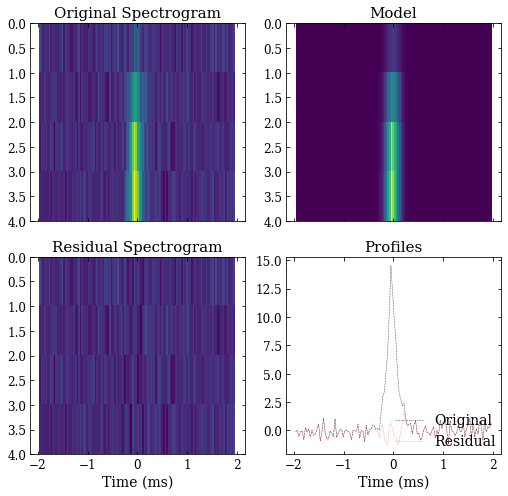

2022-07-22 01:02:35,924 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:02:35,926 - model -burstfit.fit - INFO - Found 2 components.
2022-07-22 01:02:35,930 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-07-22 01:02:35,933 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-07-22 01:02:35,935 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:02:35,937 - model -burstfit.fit - INFO - Found 2 components.
2022-07-22 01:02:35,942 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.2401406605314695
2022-07-22 01:02:35,944 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-07-22 01:02:35,946 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-07-22 01:02:35,950 - tests -root - INFO - P values: T-test (0.37031), Kruskal (0.29362), KS (0.66014), F-test (0.81517)
2022-07-22 01:0

{bf}.calc_redchisq()= (1.2401406605314695, 0.00030302445721641647)


In [8]:
bf_S1T1_c2 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t'], gauss, 
          [(0, 50, 0),(np.inf, 70, 5*bd.width)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 2, plot = True)

### with scattering

self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-07-22 01:02:38,038 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-07-22 01:02:38,041 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-07-22 01:02:38,044 - tests -root - INFO - P values: T-test (0.37031), Kruskal (0.29362), KS (0.66014), F-test (0.81517)
2022-07-22 01:02:38,046 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-07-22 01:02:38,050 - tests -root - INFO - P values: T-test (0.00065), Kruskal (0.00078), KS (0.00016), F-test (0.00049)
2022-07-22 01:02:38,052 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-07-22 01:02:38,056 - tests -root - INFO - P values: T-test (0.00094), Kruskal (0.00078), KS (0.00016), F-test (0.00005)
2022-07-22 01:02:38,058 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-07-22 01:02:38,060 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-07-22 01:02:38,062 - initial_profi

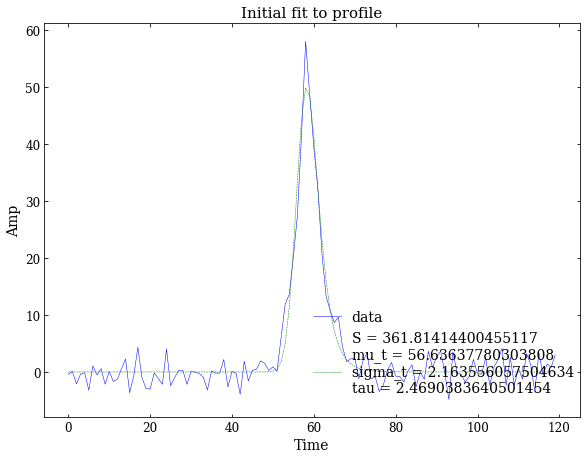

2022-07-22 01:02:38,270 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-07-22 01:02:38,273 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f447a68f0d0>
[0.08730642 0.26856065 0.43957722 0.49641785]


2022-07-22 01:02:38,279 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-07-22 01:02:38,281 - initial_spectrafit -burstfit.fit - INFO - c0: 0.0873064175248146 +- 0.0
2022-07-22 01:02:38,283 - initial_spectrafit -burstfit.fit - INFO - c1: 0.26856064796447754 +- 0.0
2022-07-22 01:02:38,285 - initial_spectrafit -burstfit.fit - INFO - c2: 0.43957722187042236 +- 0.0


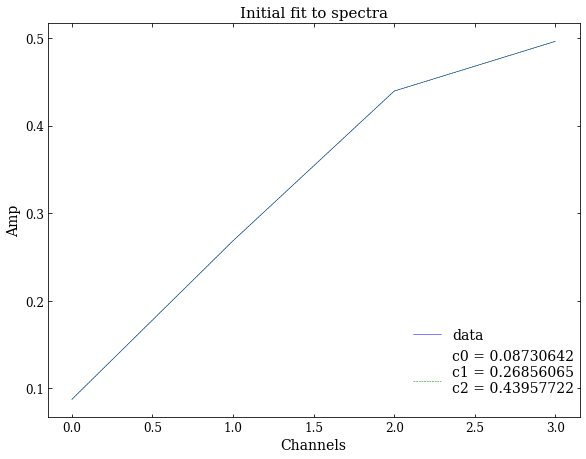

2022-07-22 01:02:38,451 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-07-22 01:02:38,454 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.08730642, 0.26856065, 0.43957722, 361.81414400455117, 56.63637780303808, 2.163556057504634, 2.4690383640501454, 111]
2022-07-22 01:02:38,663 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-07-22 01:02:38,666 - sgram_fit -burstfit.fit - INFO - c0: 0.09290958560828479 +- 0.011218566188236054
2022-07-22 01:02:38,669 - sgram_fit -burstfit.fit - INFO - c1: 0.2722176990175081 +- 0.012752945652483211
2022-07-22 01:02:38,671 - sgram_fit -burstfit.fit - INFO - c2: 0.4398315250088616 +- 0.011249646048841903
2022-07-22 01:02:38,673 - sgram_fit -burstfit.fit - INFO - S: 311.07324218127513 +- 2.253951172924655
2022-07-22 01:02:38,675 - sgram_fit -burstfit.fit - INFO - mu_t: 57.0274450442017 +- 0.21111714782778174
2022-07-22 01:02:38,676 - sgram_fit -burstfit.fit - INFO - sigma_t: 2.36139

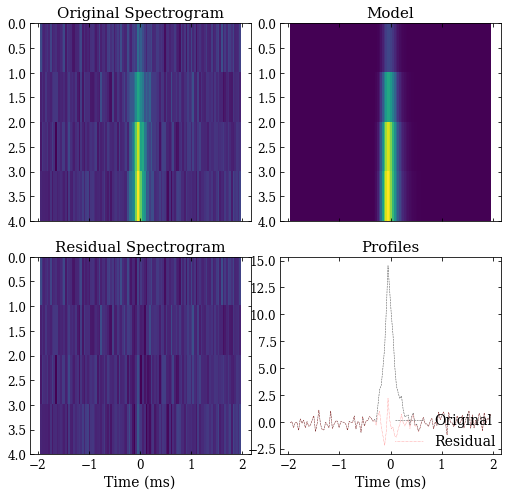

2022-07-22 01:02:39,056 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:02:39,059 - model -burstfit.fit - INFO - Found 1 components.
2022-07-22 01:02:39,063 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-07-22 01:02:39,065 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-07-22 01:02:39,067 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:02:39,069 - model -burstfit.fit - INFO - Found 1 components.
2022-07-22 01:02:39,073 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.3308353640504864
2022-07-22 01:02:39,076 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-07-22 01:02:39,078 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-07-22 01:02:39,080 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to

{bf}.calc_redchisq()= (1.3308353640504864, 1.816849002134191e-06)


In [9]:
bf_S1T2_c1 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          [(0, 50, 0, 0),(np.inf, 65, 5*bd.width, np.inf)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)


self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-07-22 01:02:40,678 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-07-22 01:02:40,681 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-07-22 01:02:40,687 - tests -root - INFO - P values: T-test (0.37031), Kruskal (0.29362), KS (0.66014), F-test (0.81517)
2022-07-22 01:02:40,688 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-07-22 01:02:40,693 - tests -root - INFO - P values: T-test (0.00065), Kruskal (0.00078), KS (0.00016), F-test (0.00049)
2022-07-22 01:02:40,695 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-07-22 01:02:40,699 - tests -root - INFO - P values: T-test (0.00094), Kruskal (0.00078), KS (0.00016), F-test (0.00005)
2022-07-22 01:02:40,701 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-07-22 01:02:40,703 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-07-22 01:02:40,706 - initial_profi

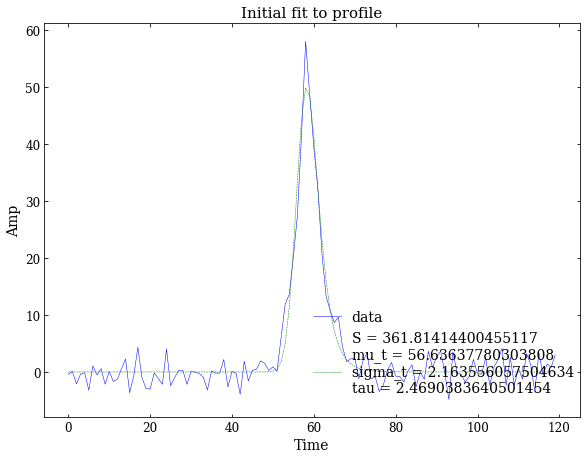

2022-07-22 01:02:40,927 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-07-22 01:02:40,932 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f447a68f0d0>
[0.08730642 0.26856065 0.43957722 0.49641785]


2022-07-22 01:02:40,940 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-07-22 01:02:40,943 - initial_spectrafit -burstfit.fit - INFO - c0: 0.0873064175248146 +- 0.0
2022-07-22 01:02:40,945 - initial_spectrafit -burstfit.fit - INFO - c1: 0.26856064796447754 +- 0.0
2022-07-22 01:02:40,947 - initial_spectrafit -burstfit.fit - INFO - c2: 0.43957722187042236 +- 0.0


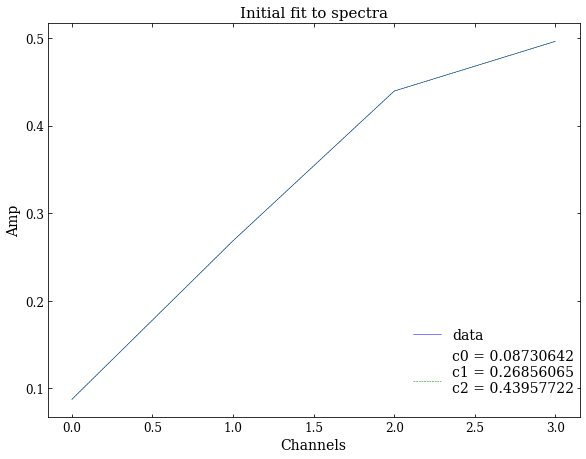

2022-07-22 01:02:41,116 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-07-22 01:02:41,119 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.08730642, 0.26856065, 0.43957722, 361.81414400455117, 56.63637780303808, 2.163556057504634, 2.4690383640501454, 111]
2022-07-22 01:02:41,340 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-07-22 01:02:41,343 - sgram_fit -burstfit.fit - INFO - c0: 0.09290958560828479 +- 0.011218566188236054
2022-07-22 01:02:41,346 - sgram_fit -burstfit.fit - INFO - c1: 0.2722176990175081 +- 0.012752945652483211
2022-07-22 01:02:41,348 - sgram_fit -burstfit.fit - INFO - c2: 0.4398315250088616 +- 0.011249646048841903
2022-07-22 01:02:41,351 - sgram_fit -burstfit.fit - INFO - S: 311.07324218127513 +- 2.253951172924655
2022-07-22 01:02:41,354 - sgram_fit -burstfit.fit - INFO - mu_t: 57.0274450442017 +- 0.21111714782778174
2022-07-22 01:02:41,357 - sgram_fit -burstfit.fit - INFO - sigma_t: 2.36139

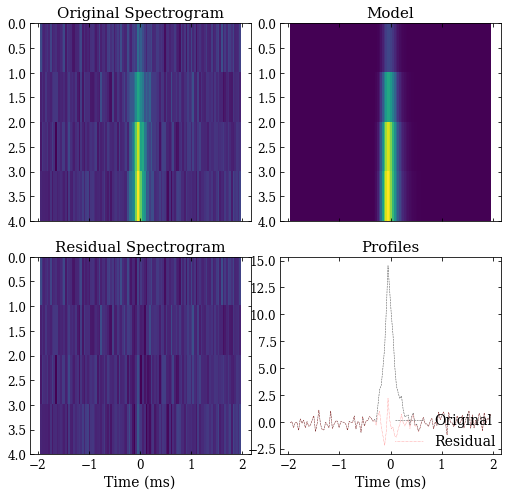

2022-07-22 01:02:41,746 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:02:41,749 - model -burstfit.fit - INFO - Found 1 components.
2022-07-22 01:02:41,752 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-07-22 01:02:41,755 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-07-22 01:02:41,757 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:02:41,759 - model -burstfit.fit - INFO - Found 1 components.
2022-07-22 01:02:41,764 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.3308353640504864
2022-07-22 01:02:41,767 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 2
2022-07-22 01:02:41,769 - fitcycle -burstfit.fit - INFO - Fitting component 2.
2022-07-22 01:02:41,772 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 2
2022-07-22 01:02:41,825 - initial_profile

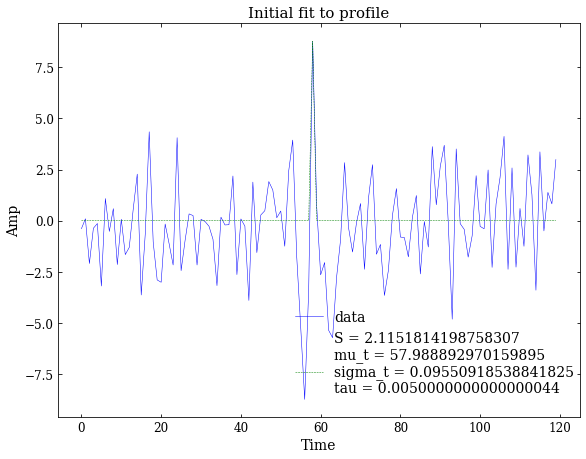

2022-07-22 01:02:41,993 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-07-22 01:02:41,996 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_normalized_4 at 0x7f447a68f0d0>
[0.4455213872447999 1.0032096525844603 -0.5552018946744655
 0.6584630969352104]


2022-07-22 01:02:42,001 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-07-22 01:02:42,003 - initial_spectrafit -burstfit.fit - INFO - c0: 0.4455213872447999 +- 0.0
2022-07-22 01:02:42,005 - initial_spectrafit -burstfit.fit - INFO - c1: 1.0032096525844603 +- 0.0
2022-07-22 01:02:42,007 - initial_spectrafit -burstfit.fit - INFO - c2: -0.5552018946744655 +- 0.0


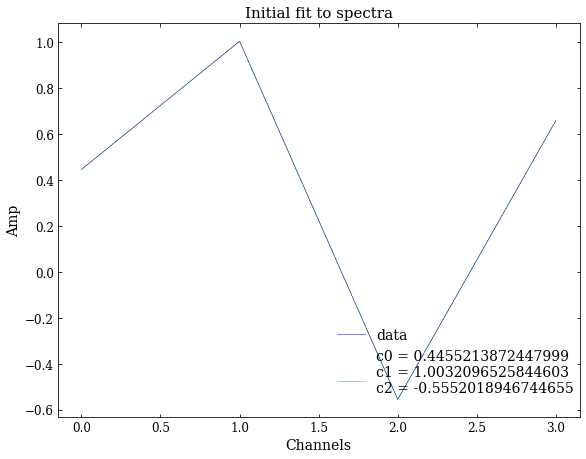

2022-07-22 01:02:42,167 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-07-22 01:02:42,171 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.4455213872447999, 1.0032096525844603, -0.5552018946744655, 2.1151814198758307, 57.988892970159895, 0.09550918538841825, 0.0050000000000000044, 111]
2022-07-22 01:02:42,527 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-07-22 01:02:42,865 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-07-22 01:02:42,868 - sgram_fit -burstfit.fit - INFO - c0: 0.35641710979584 +- 0.5655102728322527
2022-07-22 01:02:42,871 - sgram_fit -burstfit.fit - INFO - c1: 0.8025677220675683 +- 0.743472192203962
2022-07-22 01:02:42,873 - sgram_fit -burstfit.fit - INFO - c2: -0.6662422736093584 +- 1.208689470797777
2022-07-22 01:02:42,876 - sgram_fit -burstfit.fit - INFO - S: 1.8965195101054657 +- 10.288684371462791
2022-07-22 01:02:42,878 - sgram_

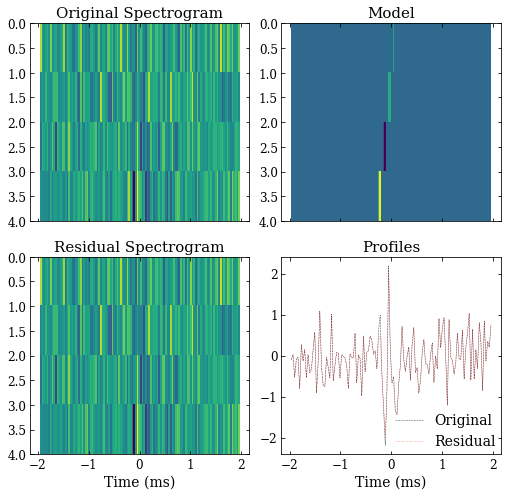

2022-07-22 01:02:43,254 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:02:43,256 - model -burstfit.fit - INFO - Found 2 components.
2022-07-22 01:02:43,262 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-07-22 01:02:43,265 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-07-22 01:02:43,268 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:02:43,270 - model -burstfit.fit - INFO - Found 2 components.
2022-07-22 01:02:43,277 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.333831376510392
2022-07-22 01:02:43,279 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-07-22 01:02:43,281 - fitall -burstfit.fit - INFO - Final number of components 2 > 1. Fitting all components together.
2022-07-22 01:02:43,283 - fit_all_components -burstfit.fit - INFO - Fitting 2 components together.
2022-0

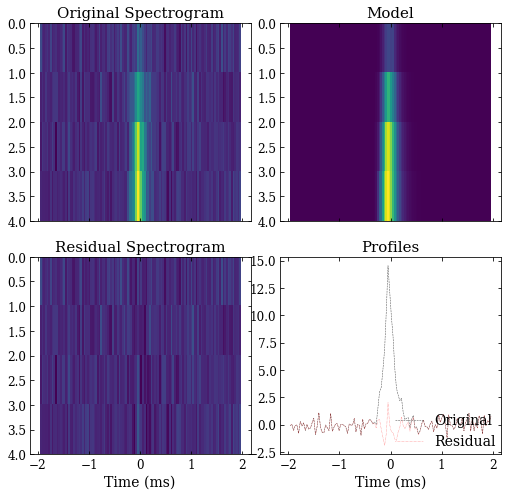

2022-07-22 01:02:44,118 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:02:44,121 - model -burstfit.fit - INFO - Found 2 components.
2022-07-22 01:02:44,126 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-07-22 01:02:44,128 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-07-22 01:02:44,130 - model -burstfit.fit - INFO - Making model.
2022-07-22 01:02:44,132 - model -burstfit.fit - INFO - Found 2 components.
2022-07-22 01:02:44,137 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.3336838085377842
2022-07-22 01:02:44,139 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-07-22 01:02:44,141 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-07-22 01:02:44,146 - tests -root - INFO - P values: T-test (0.37031), Kruskal (0.29362), KS (0.66014), F-test (0.81517)
2022-07-22 01:0

{bf}.calc_redchisq()= (1.3336838085377842, 1.8446398015736776e-06)


In [10]:
bf_S1T2_c2 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          [(0, 50, 0, 0),(np.inf, 65, 5*bd.width, np.inf)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 2, plot = True)


### Run MCMC after checking all curvfit results

2022-07-15 18:41:56,929 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-07-15 18:41:56,932 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [9.23651939e-02 2.70273681e-01 4.39332560e-01 2.84415995e+02
 5.85329141e+01 3.13654786e+00 1.10996728e+02]
2022-07-15 18:41:56,938 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-07-15 18:41:56,940 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-07-15 18:41:56,942 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prior. Setting its min value of prior to 0.
2022-07-15 18:41:57,021 - run_mcmc -burstfit.mcmc - INFO - Running MCMC with the following parameters: nwalkers=60, nsteps=5000, start_pos_dev=0.01, ncores=4, skip=500
2022-07-15 18:41:57,023 - run_mcmc -burstfit.mcmc - INFO - Priors used in MCMC are:
2022-07-15 18:41:57,024 - run_mcmc -burst

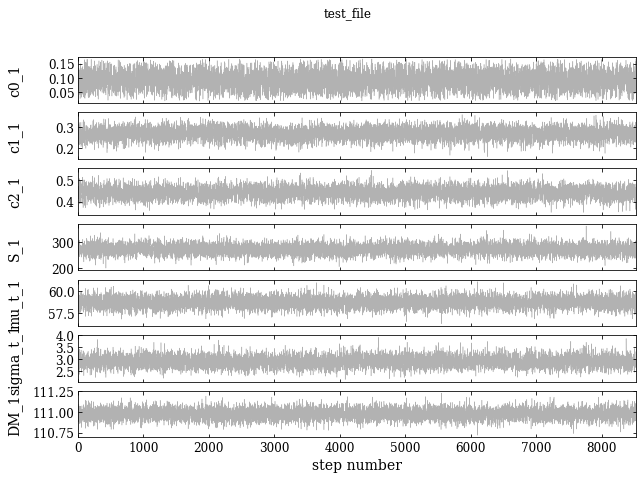

<Figure size 432x288 with 0 Axes>

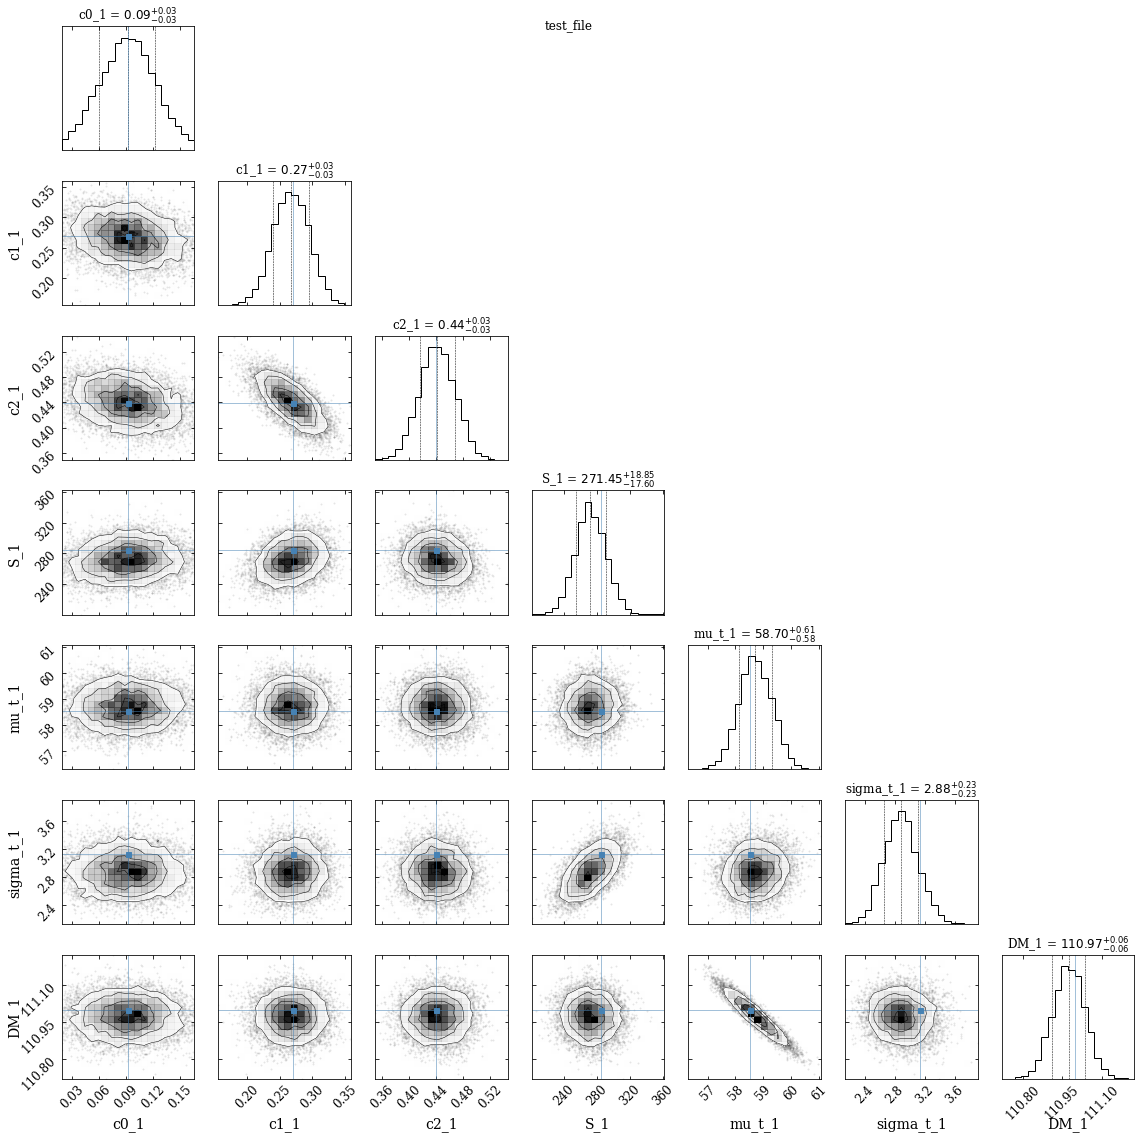

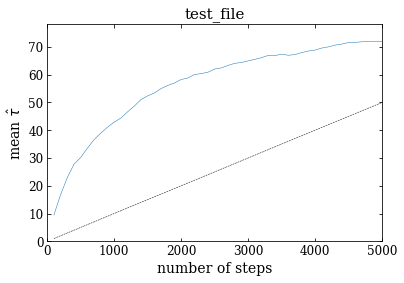

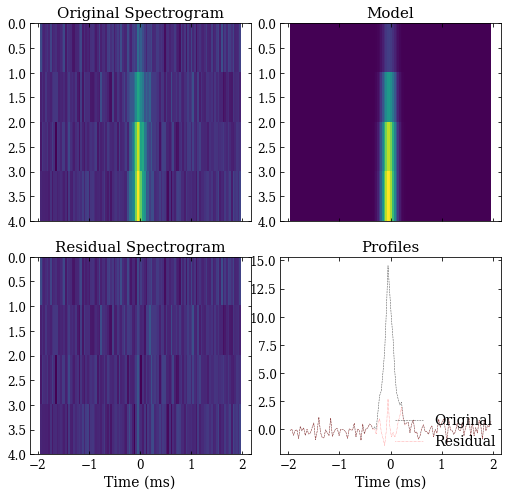

{bf}.bic =  110.58116771795545


0

In [53]:
paper_fit.fit_paper_mcmc_bic(bf_S1T1_c1, mcmc=True)

2022-07-15 18:45:58,238 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-07-15 18:45:58,242 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [ 9.98159254e-02  2.85326327e-01  4.31224680e-01  2.83488014e+02
  5.88683925e+01  3.15923010e+00  1.10963163e+02 -4.92562817e-03
  6.46500782e-02  5.85877556e-01  2.75832676e+00  5.79367075e+01
  7.88976331e-02  1.11024827e+02]
2022-07-15 18:45:58,245 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-07-15 18:45:58,247 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-07-15 18:45:58,250 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prior. Setting its min value of prior to 0.
2022-07-15 18:45:58,261 - run_mcmc -burstfit.mcmc - INFO - Running MCMC with the following parameters: nwalkers=60, nsteps=5000, start_pos_dev=0.01, ncores=4, skip=500
2022

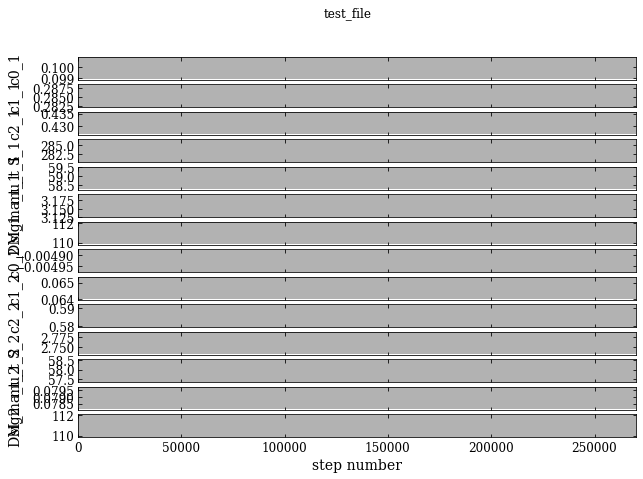

<Figure size 432x288 with 0 Axes>

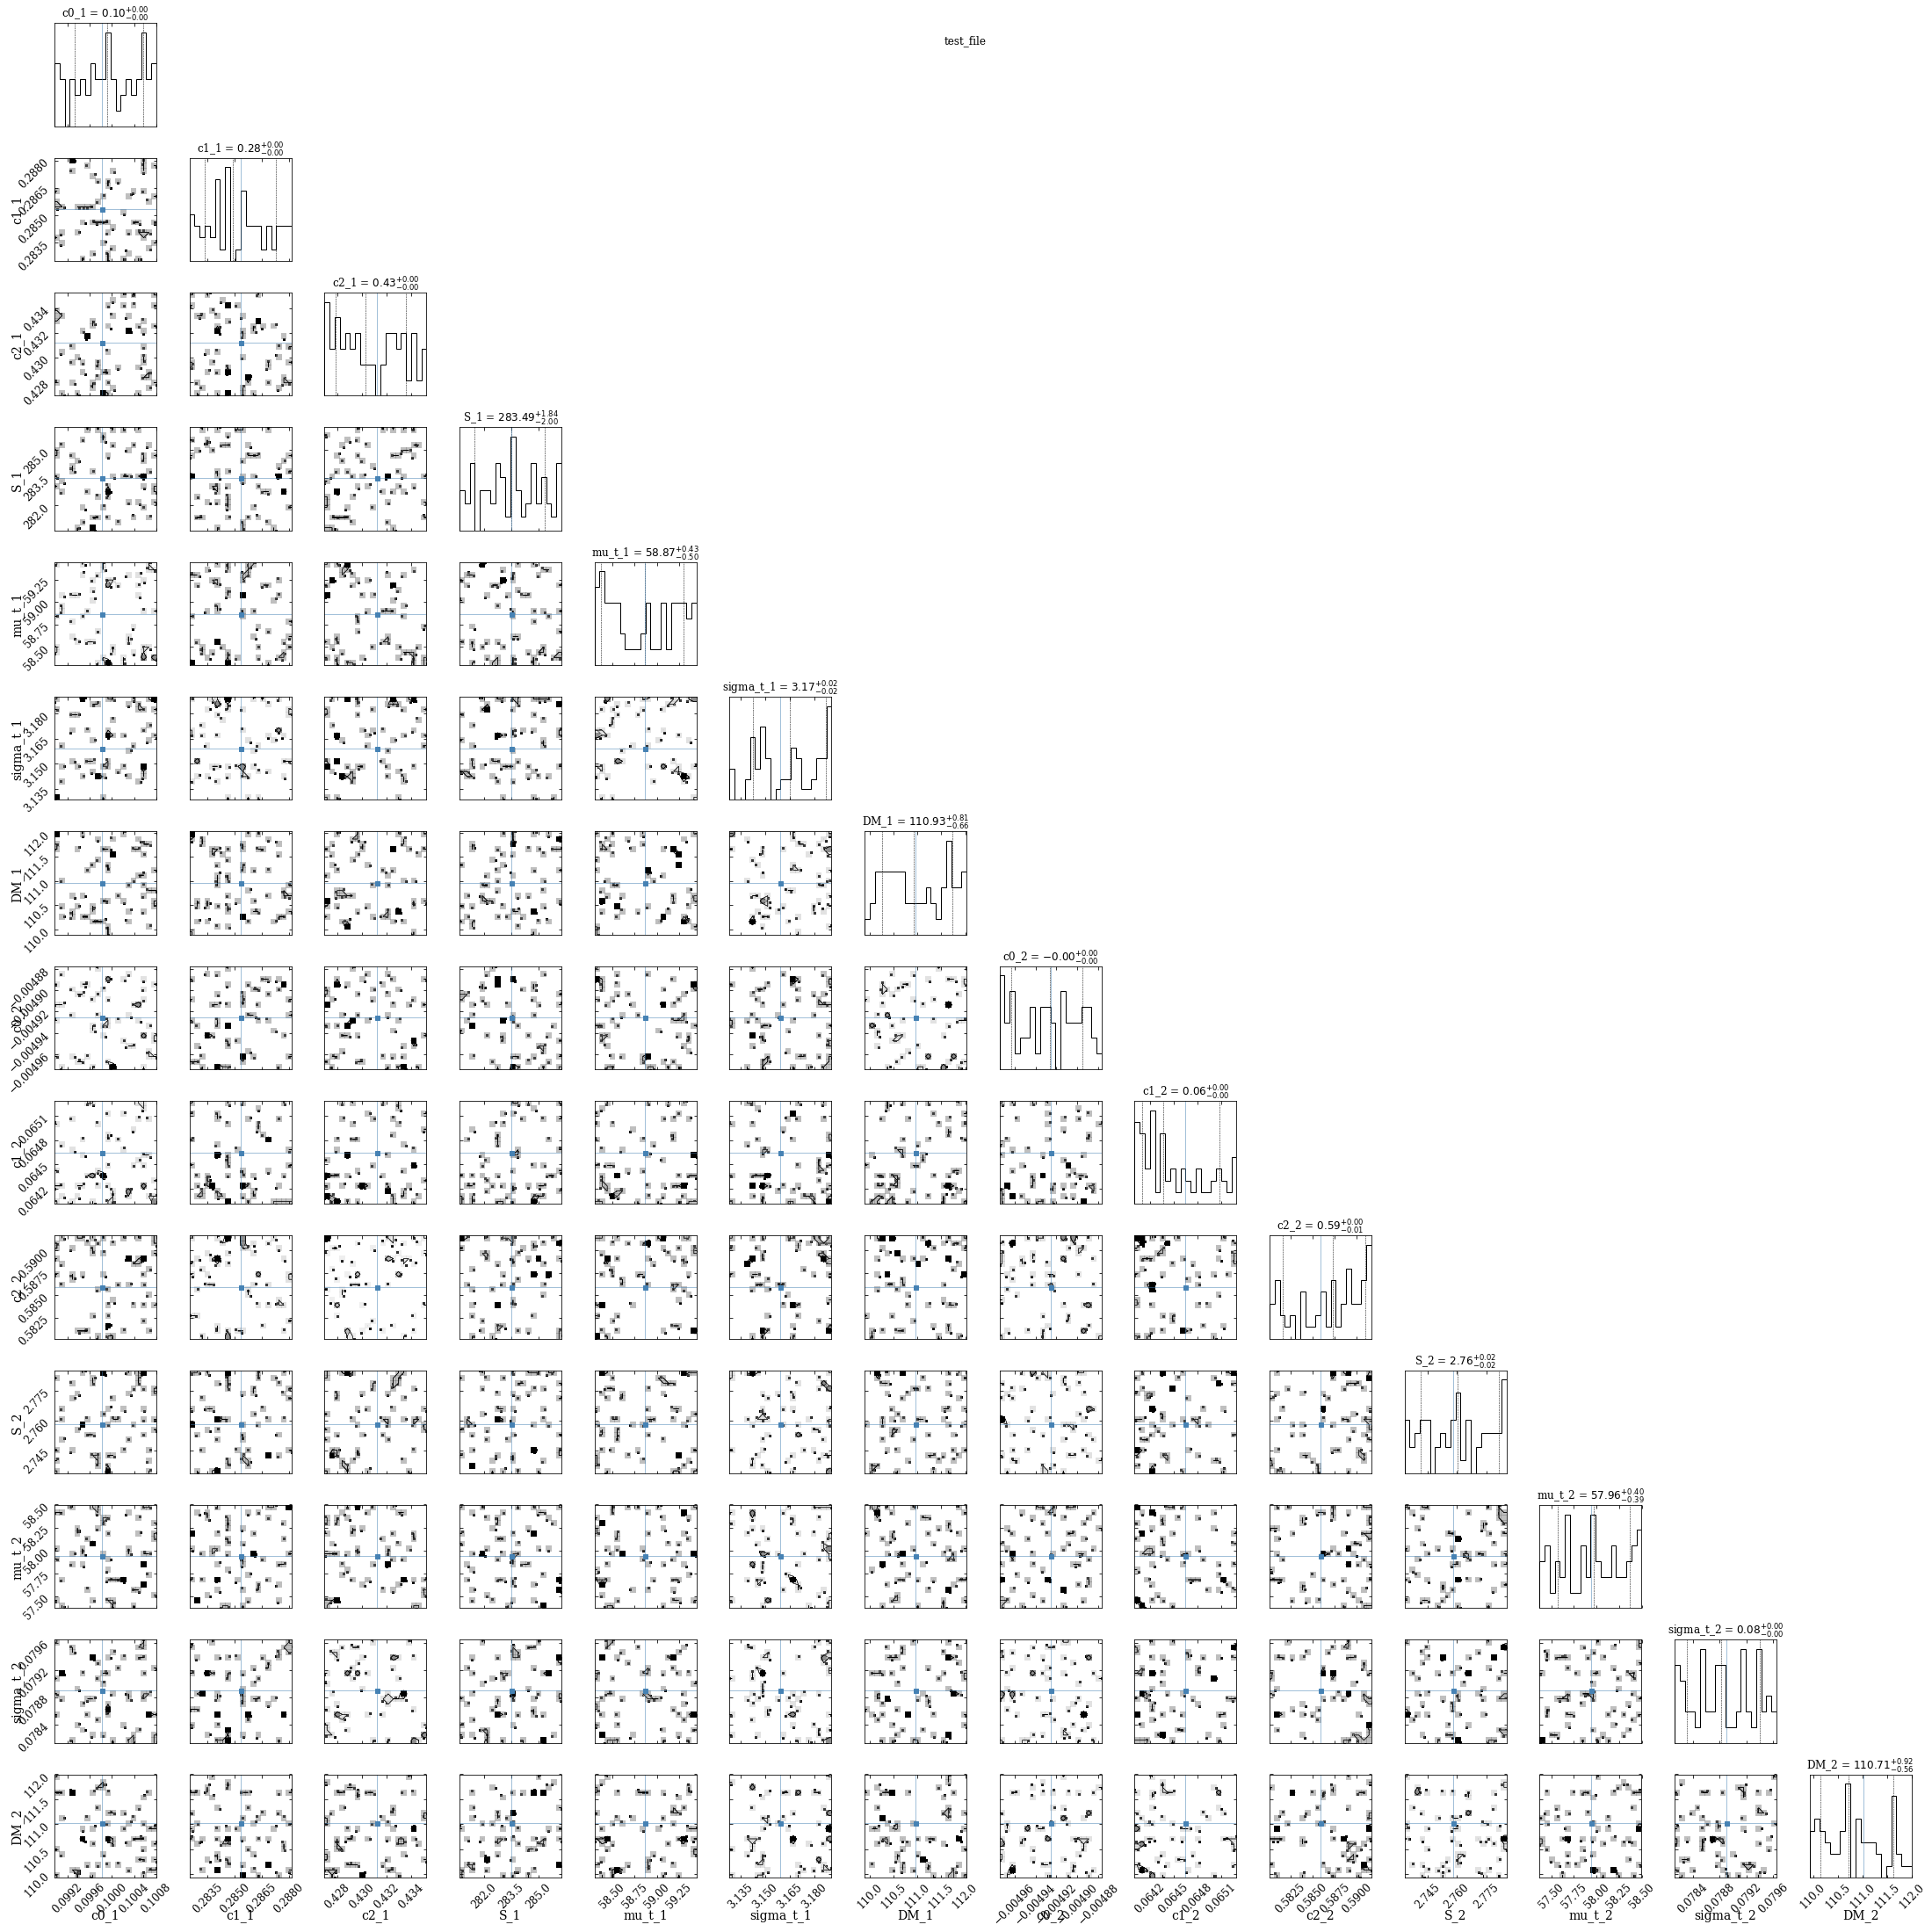

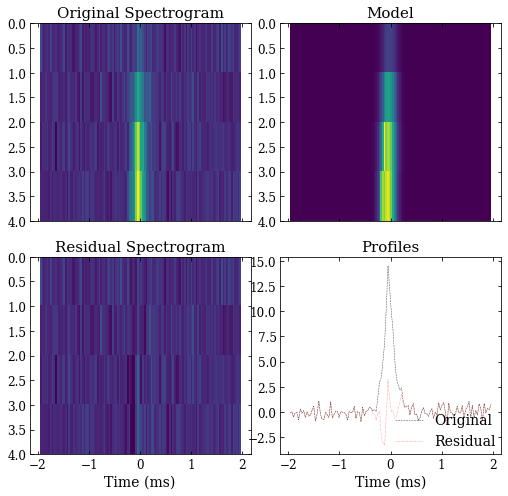

{bf}.bic =  148.8133115428212


0

In [54]:
paper_fit.fit_paper_mcmc_bic(bf_S1T1_c2, mcmc=True)

2022-07-15 18:50:28,938 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-07-15 18:50:28,942 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [9.29095856e-02 2.72217699e-01 4.39831525e-01 3.11073242e+02
 5.70274450e+01 2.36139620e+00 2.17617891e+00 1.10919188e+02]
2022-07-15 18:50:28,945 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-07-15 18:50:28,948 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-07-15 18:50:28,951 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-07-15 18:50:28,952 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(3.9171220332065473) + max_sigma_t_prior(4.250513167694049))
2022-07-15 18:50:28,954 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*

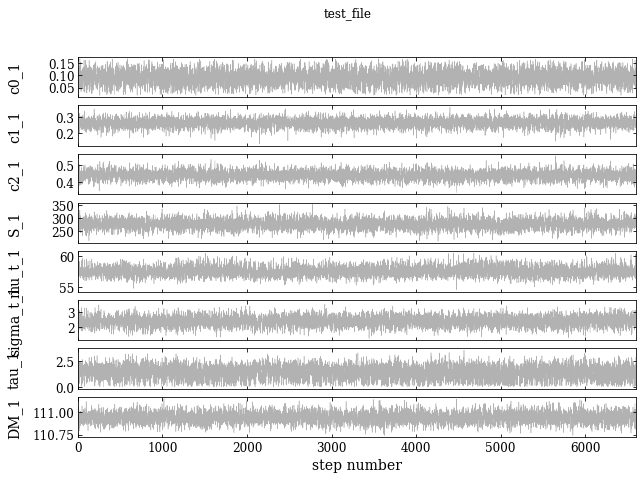

<Figure size 432x288 with 0 Axes>

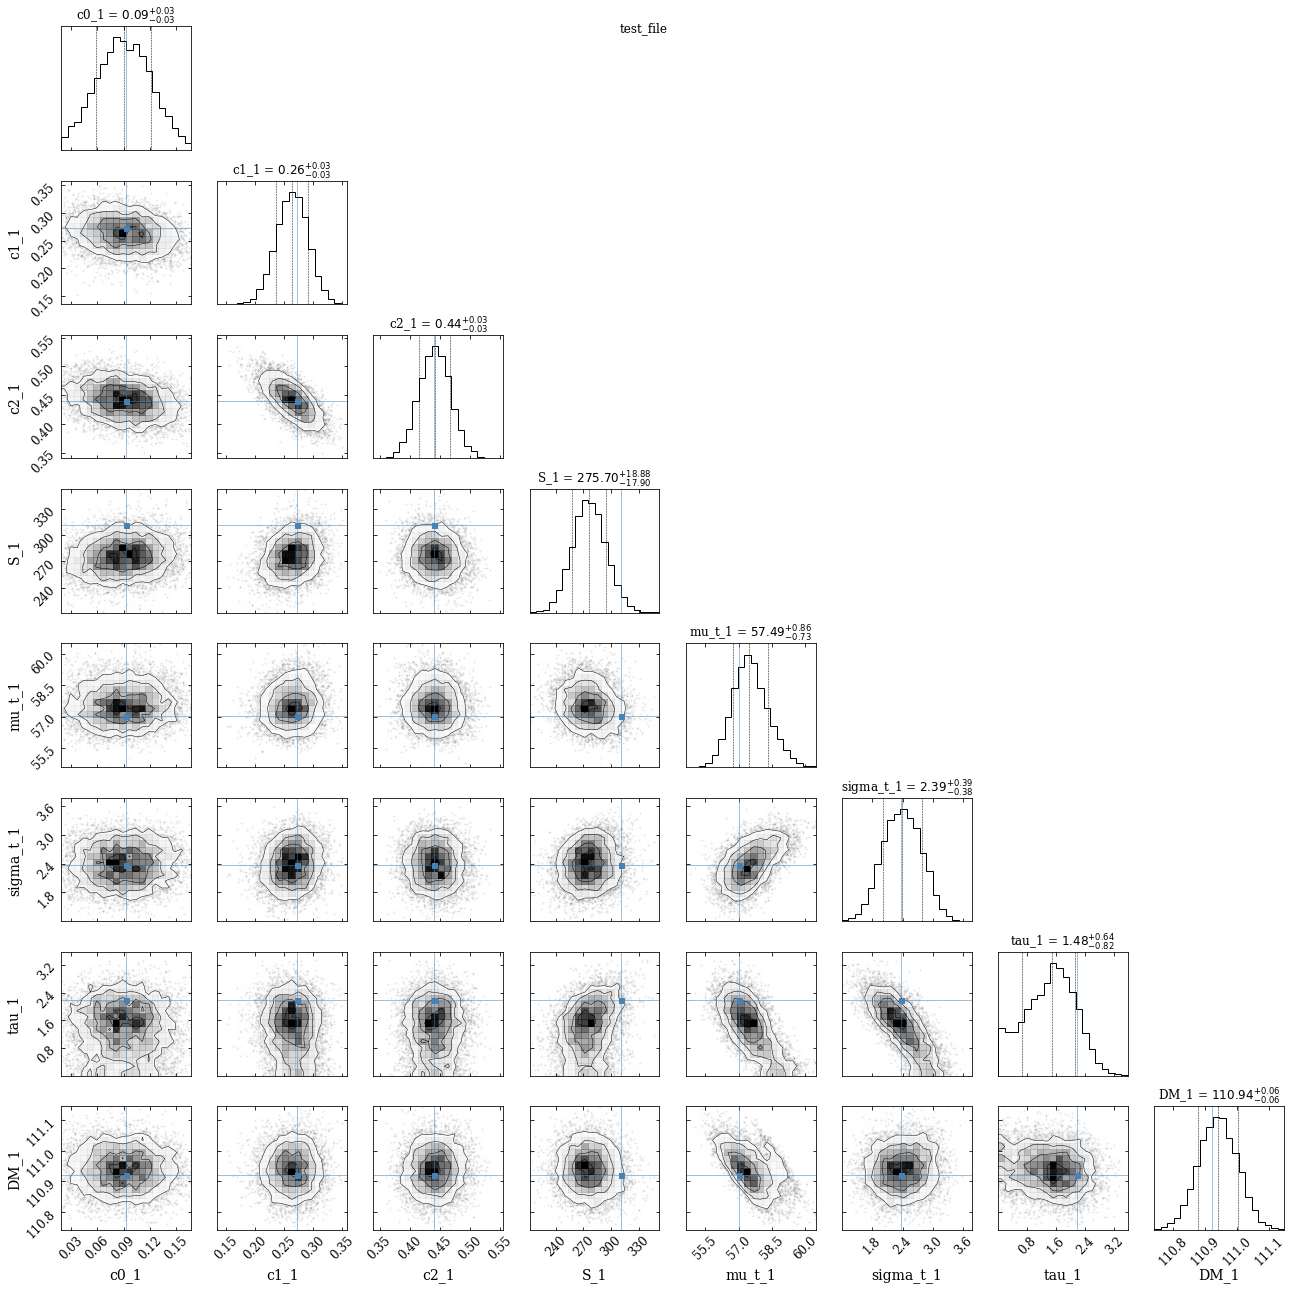

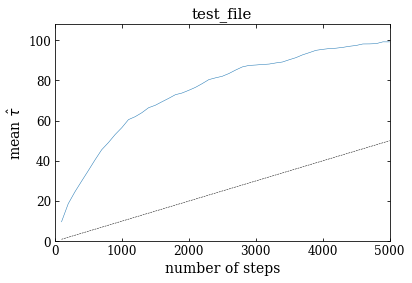

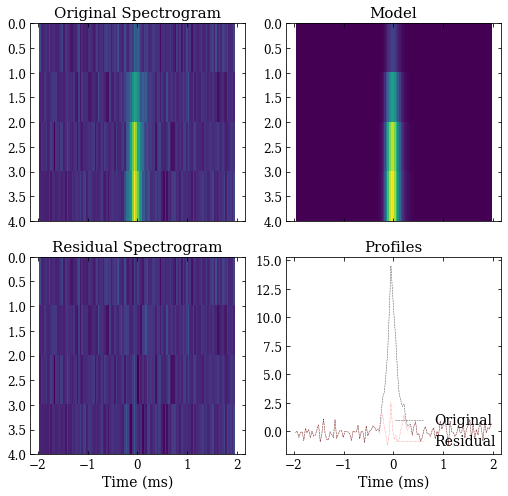

{bf}.bic =  117.03879577021044


0

In [55]:
paper_fit.fit_paper_mcmc_bic(bf_S1T2_c1, mcmc=True)

2022-07-15 18:54:32,875 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-07-15 18:54:32,878 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [ 9.28970871e-02  2.71729738e-01  4.40560456e-01  3.11081647e+02
  5.70348389e+01  2.36412889e+00  2.17522217e+00  1.10918945e+02
  3.56380616e-01  8.02496594e-01 -6.66305349e-01  1.89651951e+00
  6.08296313e+01  1.14474157e-01  5.00000000e-03  1.10323464e+02]
2022-07-15 18:54:32,880 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-07-15 18:54:32,882 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-07-15 18:54:32,884 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-07-15 18:54:32,886 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(3.9153999095024066) + max_sigma_t_prior(4.255432004561873))
2022-

2022-07-15 18:58:03,184 - hist2d -root - WARNING - Too few points to create valid contours
2022-07-15 18:58:03,370 - hist2d -root - WARNING - Too few points to create valid contours
2022-07-15 18:58:03,554 - hist2d -root - WARNING - Too few points to create valid contours
2022-07-15 18:58:03,738 - hist2d -root - WARNING - Too few points to create valid contours
2022-07-15 18:58:03,920 - hist2d -root - WARNING - Too few points to create valid contours
2022-07-15 18:58:04,105 - hist2d -root - WARNING - Too few points to create valid contours
2022-07-15 18:58:44,500 - make_autocorr_plot -burstfit.mcmc - WARNING - Not enough valid autocorrelation values to plot. Not making autocorrelation plot.


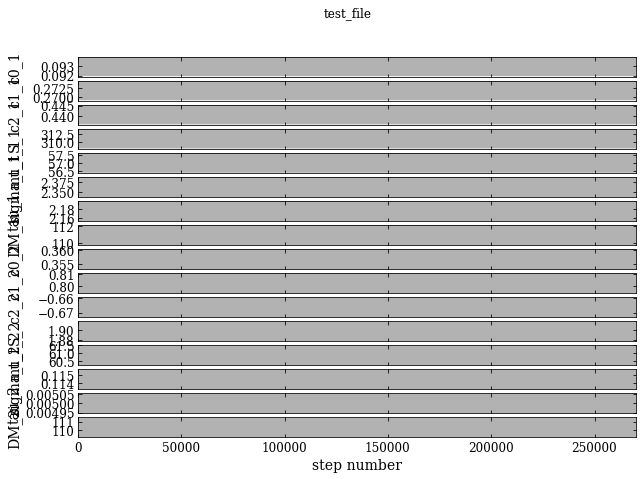

<Figure size 432x288 with 0 Axes>

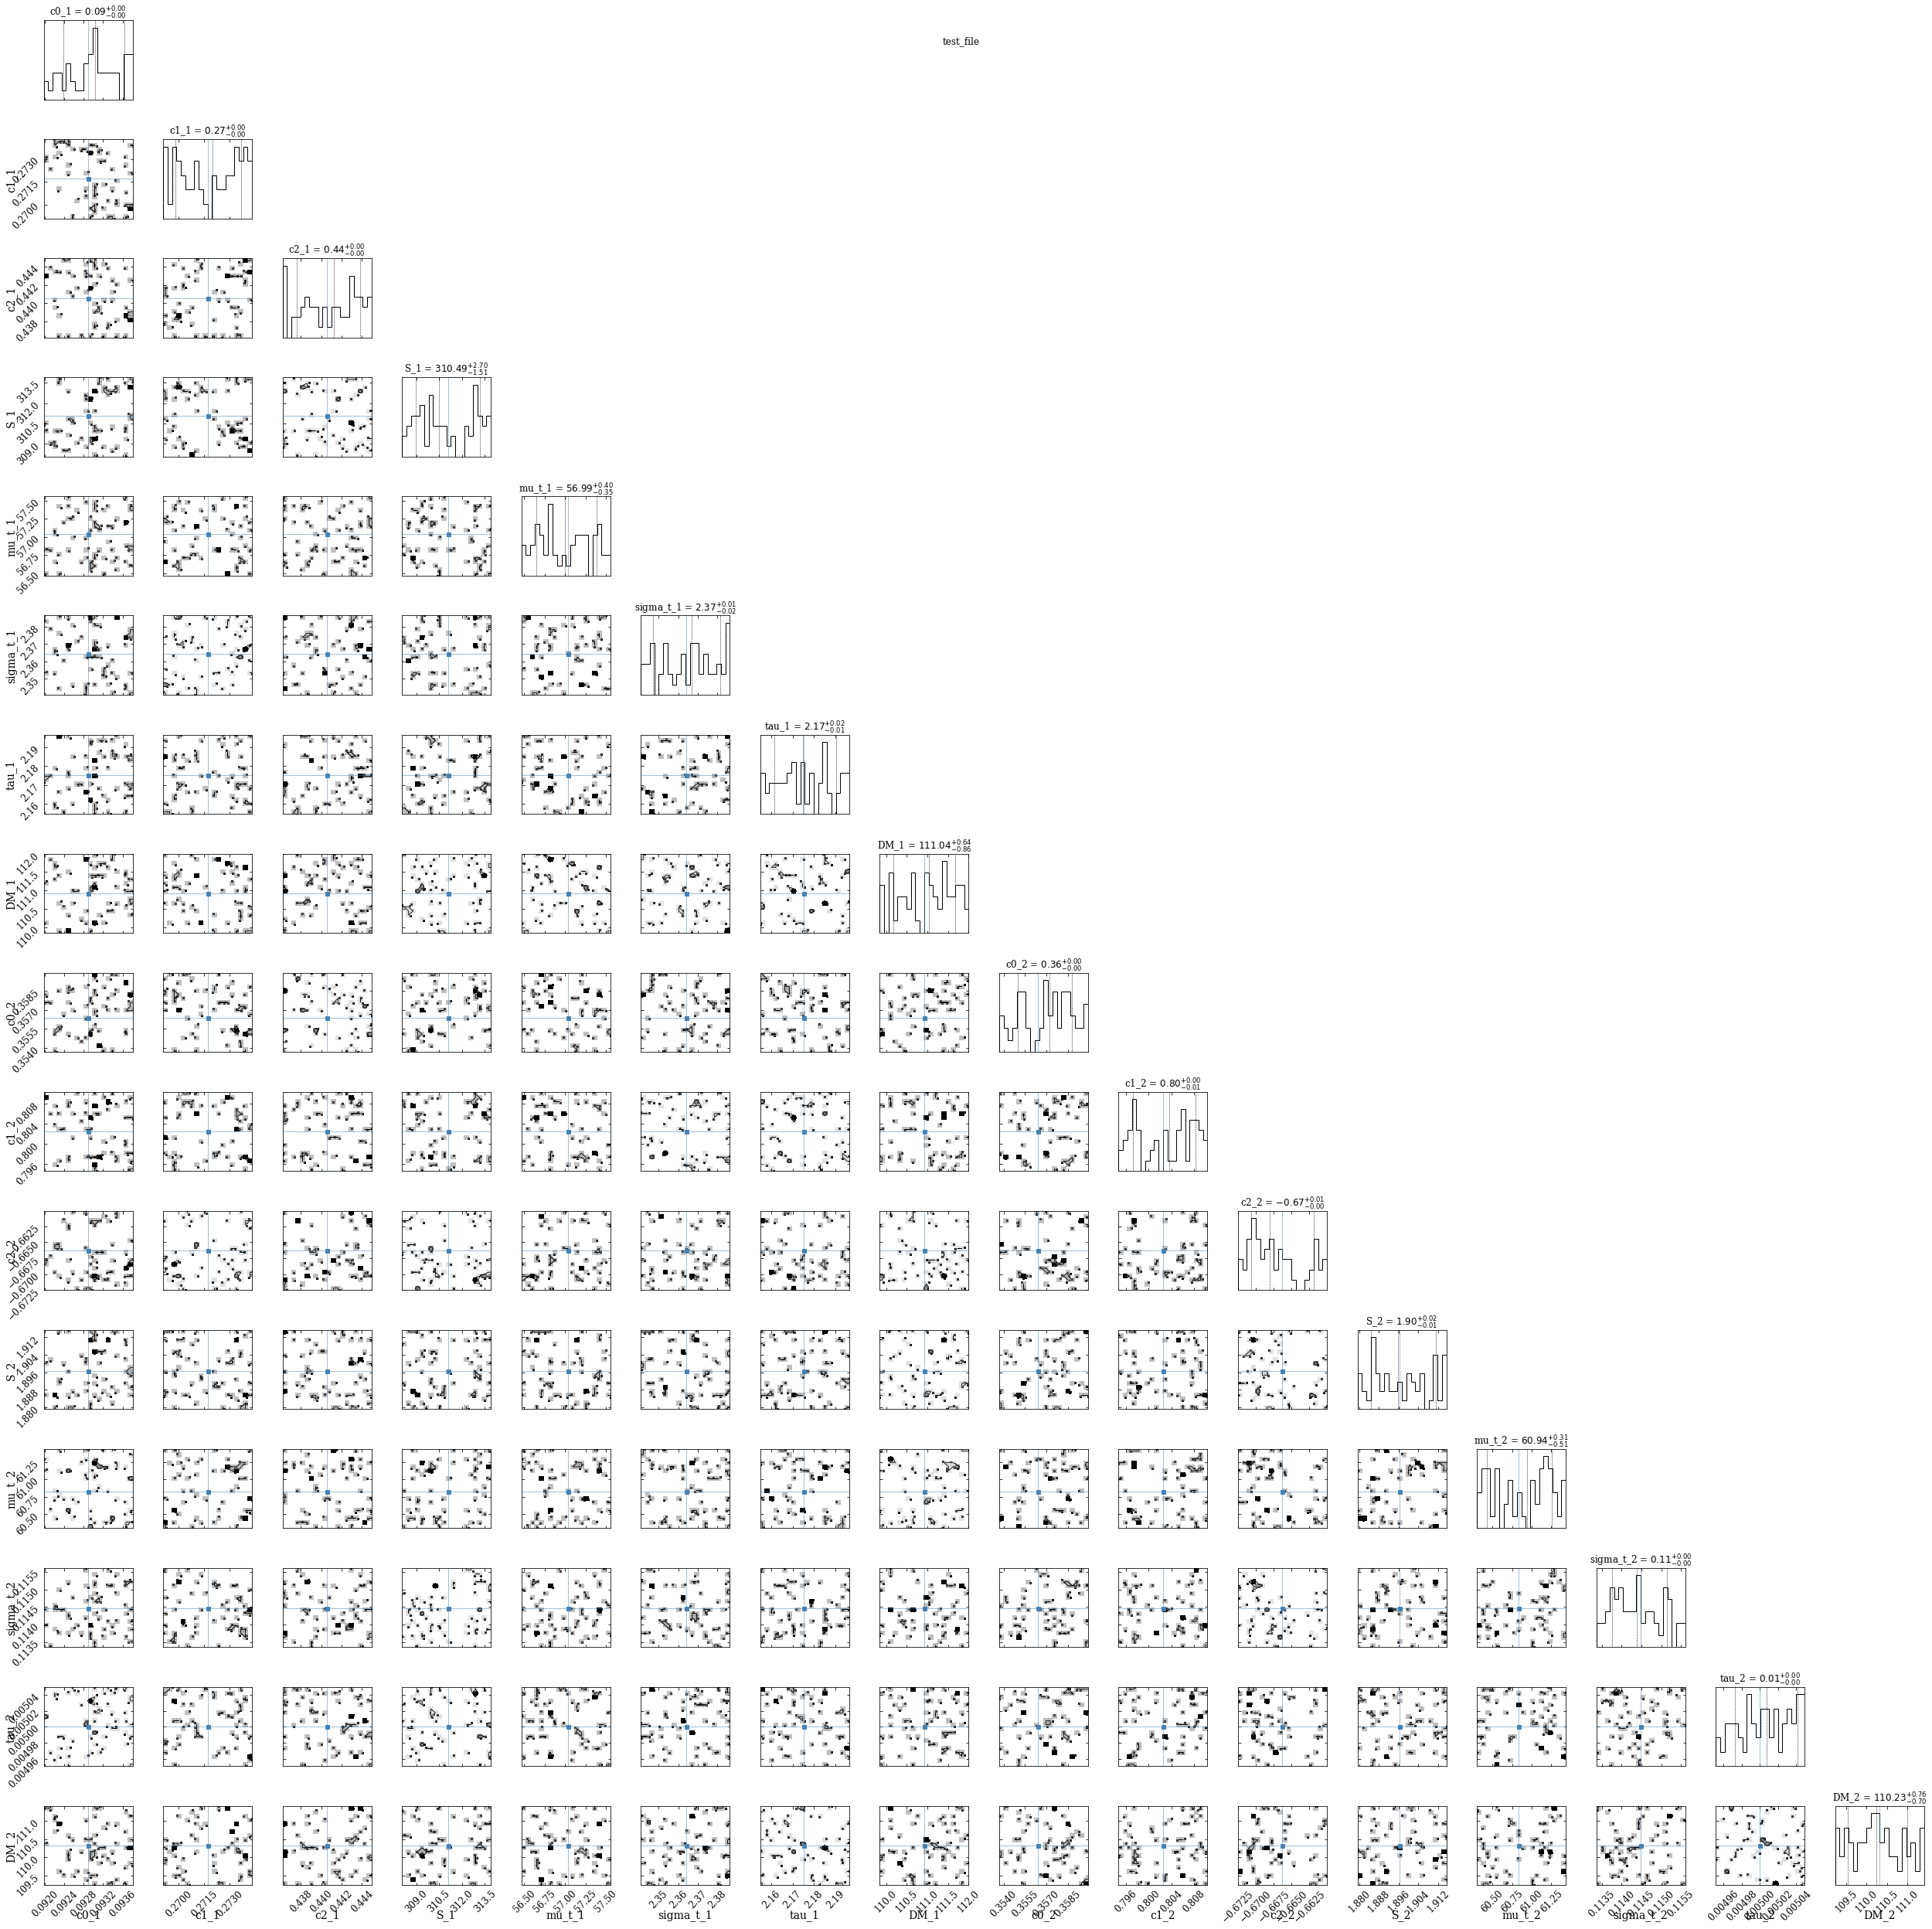

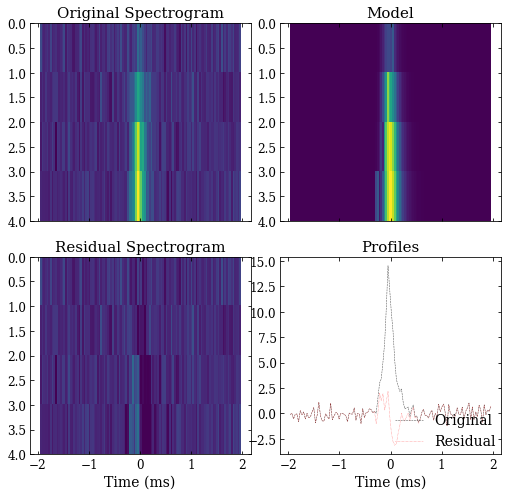

{bf}.bic =  165.4248366780293


0

In [56]:
paper_fit.fit_paper_mcmc_bic(bf_S1T2_c2, mcmc=True)

### select model and save results 

In [57]:
def select_model(bf_name_list):
    bf_with_bic_list = []
    bic_list = []
    
    for name in bf_name_list:

        if name in globals() or name in locals():
            bf = globals()[name]

            if bf.bic is None: 
                print("%s.bic not found"%name)

            else:         
                bf_with_bic_list = np.append(bf_with_bic_list, name)
                bic_list = np.append(bic_list, bf.bic)
        
        else:
            print("%s not used"%name)

    sorted_bf = ([x for _,x in sorted(zip(bic_list, bf_with_bic_list))])  
    sorted_bic = sorted(bic_list)

    print(sorted_bf) 
    print(sorted_bic)
    
    return sorted_bf, sorted_bic


def save_results(file, candidate, bf_name):
    bf_best = globals()[bf_name]
    with open(file, "a") as f:
        print(candidate, file=f)
        print(bf_name, file=f)
        for ncomp in range(bf_best.ncomponents):
            for i in range(len(bf_best.param_names)):
                print("${:.4}^{{+{:.2}}}_{{-{:.2}}}$".format(bf_best.mcmc_params[ncomp + 1]['popt'][i], 
                                                             bf_best.mcmc_params[ncomp + 1]['perr'][i][0], 
                                                             bf_best.mcmc_params[ncomp + 1]['perr'][i][1]),
                     file=f) 
                
        print("\n", file = f)
    
    return 0



# sorted_bf, sorted_bic = paper_fit.select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])
# paper_fit.save_results(file, candidate, bf_name)

sorted_bf, sorted_bic = select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])

file = "paper_fit_result.txt"
bf_name = sorted_bf[0]
save_results(file, candidate, bf_name)

bf_S1T1_c3 not used
bf_S1T2_c3 not used
['bf_S1T1_c1', 'bf_S1T2_c1', 'bf_S1T1_c2', 'bf_S1T2_c2']
[110.58116771795545, 117.03879577021044, 148.8133115428212, 165.4248366780293]


0

In [58]:
# sorted_bf, sorted_bic = paper_fit.select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])

## Spectrum

In [90]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def find_param_value(bf, param_name, ncomp = 1):
    ind = np.argwhere(np.array(bf.param_names) == param_name)[0][0]
    param_value = bf.mcmc_params[ncomp]['popt'][ind]
    
    return param_value
    


def make_spectra_after_fitting(bf, data, weight = True):
        """
        Make the spectra by using the profile fitting parameters.
        Weight time sample by SNR 

        Returns:

        """
        tau_width = 0
        
        # make spec for each component
        # another case: multi-peak 
        try:
            print("Making spectra using profile fit parameters.")
            mu_idx = np.where(np.array(bf.profile_param_names) == "mu_t")[0]
            sig_idx = np.where(np.array(bf.profile_param_names) == "sigma_t")[0]
            assert len(mu_idx) == 1, "mu not found in profile parameter names"
            assert len(sig_idx) == 1, "sigma not found in profile parameter names"
            bf.i0 = bf.profile_params[bf.comp_num]["popt"][mu_idx[0]]
            width = 2.355 * bf.profile_params[bf.comp_num]["popt"][sig_idx[0]]
            if "tau" in bf.profile_param_names:
                t_idx = np.where(np.array(bf.profile_param_names) == "tau")[0]
                assert len(t_idx) == 1, "tau not found in profile parameter names"
                tau_width += bf.profile_params[bf.comp_num]["popt"][t_idx[0]]
            width = int(width)
            bf.i0 = int(bf.i0)
        except (KeyError, AssertionError) as e:
            print(f"{e}")
            width = bf.width
            if bf.comp_num == 1:
                print(
                    f"Making spectra using center bins. Could be inaccurate."
                )
                bf.i0 = bf.nt // 2
            else:
                print(
                    f"Making spectra using profile argmax. Could be inaccurate."
                )
                bf.i0 = np.argmax(bf.ts)

        if width > 2:
            start = bf.i0 - width // 2
            end = bf.i0 + width // 2
        else:
            start = bf.i0 - 1
            end = bf.i0 + 1
        if start < 0:
            start = 0
        if end > bf.nt:
            end = bf.nt
        end += int(tau_width)
        print(f"Generating spectra from sample {start} to {end}")
        
        data_chop = data[:, start : end + 1]
        #print("data shape", np.shape(data_chop))
        
        if weight: 
            weights = data[:, start : end + 1].mean(0) ** 2 # weights length = time sample number 
            #print("weights length = time sample length ", np.shape(weights))
            spectra = np.average(data_chop, axis = 1, weights = weights)
        else: 
            spectra = np.average(data_chop, axis = 1) 

        print(f"Normalising spectra to unit area.")
        spectra = spectra / np.trapz(spectra)
        
        plt.figure()
        plt.plot(spectra)
        plt.xlabel("Channel")
        plt.title("Normalized Spectrum (raw resolution); weighted=%r"%weight)
        plt.show()
        
        return spectra 

    
# modified from Liam's code 

def acf(bd, data):
    """
    Liam 
    data: 1-d spectrum 
    """
       
    bw = np.abs(bd.foff * bd.nchans)
    
    nfreq = len(data)
    dnu_arr = range(nfreq)
    data_mean = data.mean()
    acf = np.zeros([nfreq])
    dnu_arr = np.linspace(0, bw, nfreq) # array of \Delta \nu
    data = data - data_mean # mean-removed 

    for dnu, dnus in enumerate(dnu_arr): # dnus is the Delta frequency array 
        norm1 = 0 #np.zeros([nfreq])                                                                 
        norm2 = 0 #np.zeros([nfreq])                                                                 

        counter = 0
        for ii in range(nfreq):
                if ii + dnu >= nfreq:
                        continue

                norm = (np.sum(data[ii]**2))**0.5*(np.sum(data[ii+dnu]**2))**0.5 
                if data[ii] != 0 and data[ii+dnu] != 0:
                        val = data[ii] * data[ii+dnu]
                        #val /= (np.abs(data[ii]-data_mean)*np.abs(data[ii+dnu]-data_mean))         
                        acf[dnu] += val
                        norm1 += data[ii]**2
                        norm2 += data[ii+dnu]**2
                        counter += 1

        if counter != 0:
                acf[dnu] /= np.sqrt(norm1 * norm2)
#                       acf[dnu] /= counter   

    return dnu_arr, acf



def lorenz_func(x, a, b, dnu_bw):
    return a * (x ** 2 + dnu_bw ** 2) ** -1 + b


def plot_acf_results(dnu, corr, pp, cov, tmax = 405):
    fig1, ax1 = plt.subplots(1, 1, figsize=(12, 8)) 
    ax1.set_xlabel(r'$\Delta \nu$ (MHz)')
    ax1.semilogx(dnu[1:2000], corr[1: 2000], label="The autocorrelation function of Spectrum")
    ax1.semilogx(dnu[1:tmax], lorenz_func(dnu[1:tmax], pp[0], pp[1], pp[2]), lw=3, label='best-fit Lorenzian')
    ax1.vlines(x = pp[2], ymin = min(corr[1: 2000]), ymax=max(corr[1: 2000]), lw=1, color = 'k', label="decorrelation bw")
    ax1.legend()
    
    return 0

def fit_acf(bd, data, tmax = 405):
    """
    data: 1-d spectrum 
    tmax: only want to fit the central peak 
    
    Return: 
    dnu: delta frequency in MHz 
    
    """
    dnu, corr = acf(bd, data)
    
    plt.figure()
    plt.semilogx(dnu[1:tmax], corr[1:tmax])
    plt.ylabel("ACF")
    plt.xlabel(r"$\Delta$ $\nu$ (MHz)")
    
    pp, cov = curve_fit(lorenz_func, dnu[1:tmax], corr[1:tmax], p0=[50.0, 0, 20.0])
    print("Decorrelation bandwidth", pp[2])
    print(cov[2,2]**0.5)
    
    plt.figure()
    #plt.plot()
    
    return dnu, corr, pp, cov

2022-07-19 22:36:25,357 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-07-19 22:36:26,033 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-07-19 22:36:26,036 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-07-19 22:36:26,039 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (masked, masked)


using filterbank  /home/ubuntu/vikram/scratch/220319aaeb.fil
data_burst.mean(0), data_burst.mean(0) [0.22250926 0.22561203 0.21161114 0.22265266 0.22412772 0.204565
 0.23194204 0.22165819 0.2287789  0.2112925  0.22546804 0.2144037
 0.2166739  0.22870557 0.23958904 0.20175803 0.22067364 0.25283164
 0.21837115 0.20648342 0.2057532  0.22397071 0.2177795  0.2111532
 0.25098747 0.20937778 0.21883826 0.22713782 0.22661547 0.21114445
 0.22542697 0.22476089 0.22327702 0.21918477 0.20469409 0.22611548
 0.2236792  0.22375333 0.23900665 0.20814408 0.22556086 0.22330908
 0.20005633 0.23709674 0.21502359 0.2268049  0.22814097 0.23728663
 0.23477113 0.22669363 0.23080416 0.22563969 0.26340607 0.3013982
 0.31216758 0.35431588 0.40127802 0.49174488 0.59638757 0.53625196
 0.47755924 0.4301711  0.35698387 0.30999404 0.29418474 0.2805081
 0.28645948 0.25332183 0.23671825 0.23964447 0.2411521  0.2174276
 0.23743425 0.24638647 0.2172612  0.21954103 0.20302057 0.21055247
 0.22729023 0.23557095 0.22026221 0.

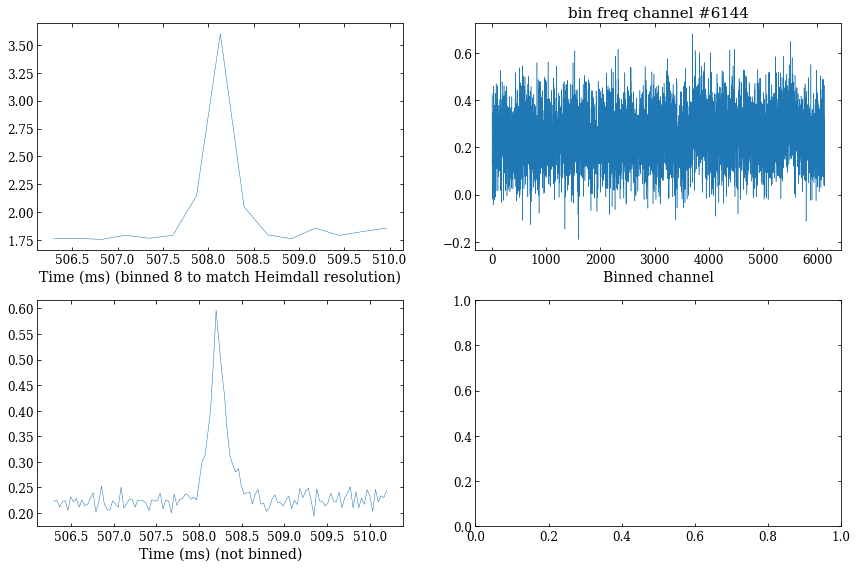

In [84]:
mu_spec, sigma_spec, dm_spec = find_param_value(bf_S1T1_c1, 'mu_t'), find_param_value(bf_S1T1_c1, 'sigma_t'), find_param_value(bf_S1T1_c1, 'DM')
nfreq_spec = bd.nchans
fil_file_dedispersed = '/home/ubuntu/gechen/software/burstfit/fil_files_dedispersed/%s_%d_%s.txt'%(candidate, nfreq_spec, str(voltage))

bd_spec, fil_file_spec  = paper_fit.prepare_bd(candidate, dm_spec, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           voltage=True)


data_spec = paper_fit.prepare_burst_data(fil_file_spec, fil_file_dedispersed, candidate, bd_heimdall, bd, voltage = True,
                                t_chop_center_s=0.5, t_chop_width = t_chop_width_int * width_heimdall, 
                               dedisperse=True, nfreq = bd.nchans)


Making spectra using profile fit parameters.
Generating spectra from sample 55 to 61
Normalising spectra to unit area.


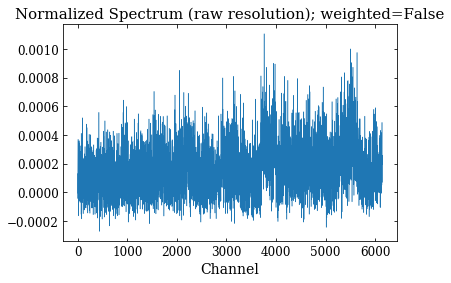

Making spectra using profile fit parameters.
Generating spectra from sample 55 to 61
Normalising spectra to unit area.


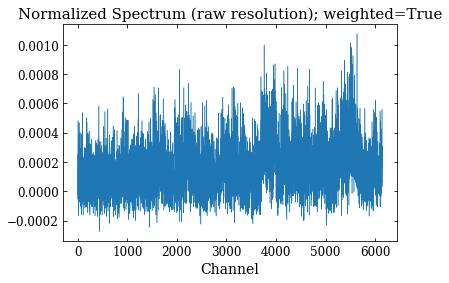

In [87]:
spec = make_spectra_after_fitting(bf_S1T1_c1, data_spec, weight = False)

spec = make_spectra_after_fitting(bf_S1T1_c1, data_spec, weight = True)
#dnu, corr, pp, cov = fit_acf(bd_spec, spec)

Decorrelation bandwidth 4.529701213773643
0.15566597433169385


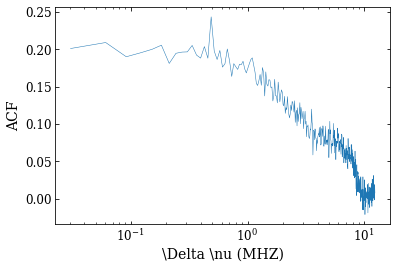

<Figure size 432x288 with 0 Axes>

In [88]:
dnu, corr, pp, cov = fit_acf(bd_spec, spec)

0

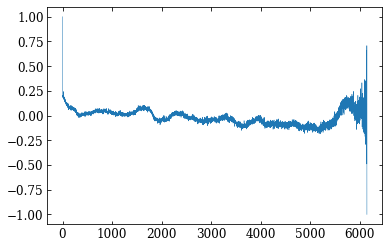

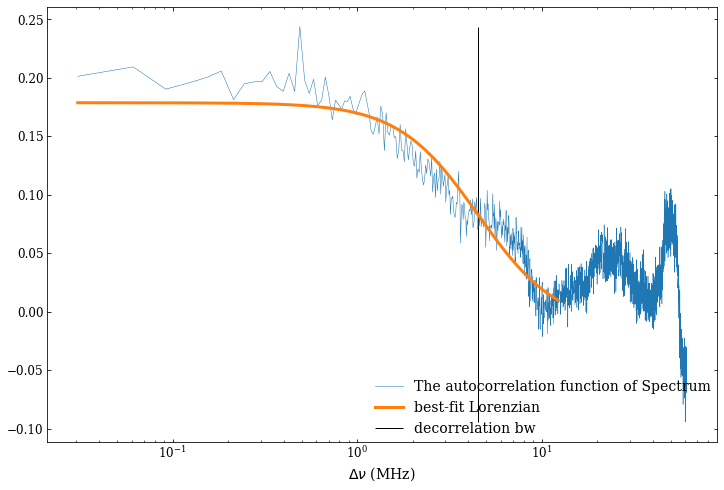

In [92]:
plt.plot(corr)
plot_acf_results(dnu, corr, pp, cov)